In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [176]:
plt.style.use('ggplot')
df = pd.read_csv("/content/drive/MyDrive/Datasets/Reviews.csv")

In [177]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [178]:
df['ProductId'].value_counts()

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [179]:
df.query('ProductId == "B007JFMH8M"')['Text'][562970]

'I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list!'

In [180]:
df.shape
df = df.head(600)

In [181]:
print(df.shape)

(600, 10)


In [182]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      600 non-null    int64 
 1   ProductId               600 non-null    object
 2   UserId                  600 non-null    object
 3   ProfileName             600 non-null    object
 4   HelpfulnessNumerator    600 non-null    int64 
 5   HelpfulnessDenominator  600 non-null    int64 
 6   Score                   600 non-null    int64 
 7   Time                    600 non-null    int64 
 8   Summary                 600 non-null    object
 9   Text                    600 non-null    object
dtypes: int64(5), object(5)
memory usage: 47.0+ KB


In [184]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


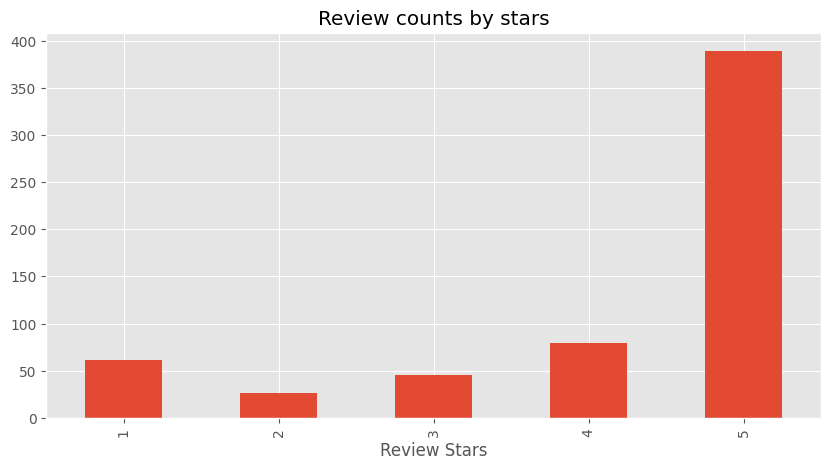

In [185]:
# Quick EDA (Exploratory Data Analysis)
ax = df['Score'].value_counts()\
.sort_index()\
.plot(kind = 'bar',
      title = "Review counts by stars",
      figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [186]:
example = df['Text'][50]

In [187]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [188]:
# To get rid of commas, periods (Optional)
example_tokenized = [word for word in word_tokenize(example) if re.search('^[a-zA-Z]', word)]

In [189]:
example_tokenized

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 'Its',
 'mushy',
 'soft',
 'I',
 'do',
 "n't",
 'like',
 'it',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go']

In [190]:
example_tokenized[:5]

['This', 'oatmeal', 'is', 'not', 'good']

In [191]:
# To see the Parts of Speech
tagged = nltk.pos_tag(example_tokenized)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('Its', 'PRP$'),
 ('mushy', 'JJ'),
 ('soft', 'JJ'),
 ('I', 'PRP'),
 ('do', 'VBP')]

In [192]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() # Same as print(entities) but it formats the Output to pretty form

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  Its/PRP$
  mushy/JJ
  soft/JJ
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  (PERSON Quaker/NNP Oats/NNP)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB)


In [193]:
# Vader Sentimental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [194]:
sia = SentimentIntensityAnalyzer()

In [195]:
sia.polarity_scores("I'm satisfied")

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}

In [196]:
sia.polarity_scores("This is the worst watch ever!")

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [197]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [198]:
# Running the polarity scores on the entire data frame
result = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myId = row['Id']
  result[myId] = sia.polarity_scores(text)

  0%|          | 0/600 [00:00<?, ?it/s]

In [199]:
polarity_scores = pd.DataFrame(result).T

In [200]:
polarity_scores.reset_index(inplace = True)

In [202]:
polarity_scores.drop('index', axis = 1, inplace = True)

In [203]:
vaders = pd.concat([df, polarity_scores], axis = 1)
# another way of merging the polarity scores after making sure that the index column is renamed
# polarity_scores.merge(df, how ='right')

In [204]:
vaders

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,B000G6RYNE,A216YA3CYXIOGI,lady in the south,1,1,5,1280620800,GREAT TASTING CHIPS,This is the second purchase of Kettle Potato C...,0.022,0.845,0.133,0.9206
596,597,B000G6RYNE,A20FQULBVVWA8B,"L. Ljunghammar ""Eclectic Scout""",1,1,5,1266796800,"Buy These, Eat These, Be Happy!",How to achieve potato chip nirvana? It's simpl...,0.000,0.797,0.203,0.8567
597,598,B000G6RYNE,A1LFB8KRBI9IE2,"Kenneth Holmes ""flippper60""",1,1,5,1257206400,Eating them for years.,I found these more than 10 years ago in a heal...,0.063,0.859,0.078,0.4101
598,599,B000G6RYNE,A2N10M1J3KJZK4,MT_Soul,1,1,5,1249084800,These chips will make you fat,But you will enjoy ever step. I gained 5 lbs w...,0.146,0.571,0.283,0.8802


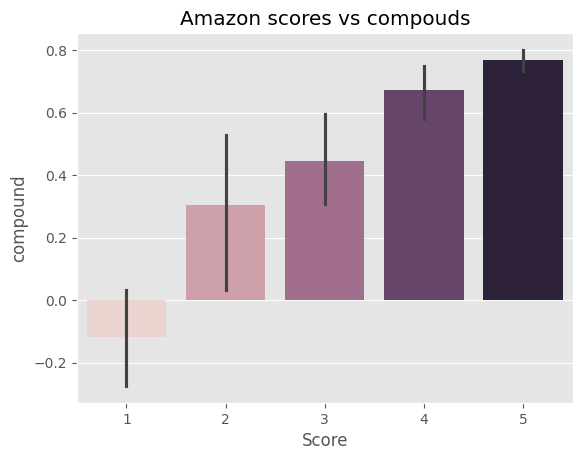

In [205]:
# Amazon scores vs Compounds
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound', hue = 'Score')
ax.set_title("Amazon scores vs compouds")
ax.legend_.remove()
plt.show()

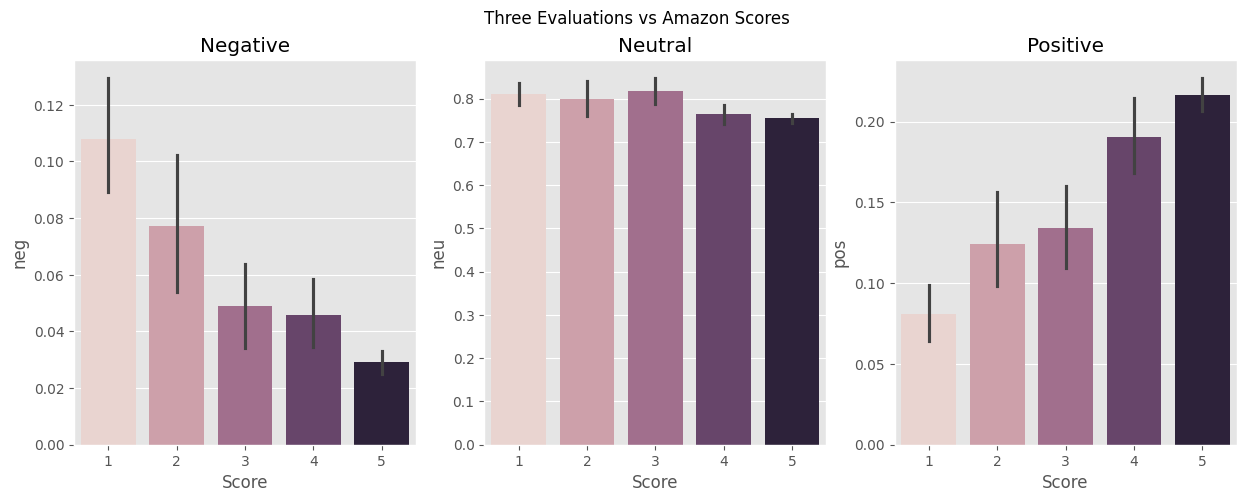

In [206]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
evals = ['neg', 'neu', 'pos']
titles = ['Negative', 'Neutral', 'Positive']
for i in range(len(axs)):
  sns.barplot(data = vaders, x = 'Score', y = evals[i], hue = 'Score', ax = axs[i])
  axs[i].set_title(titles[i])
  axs[i].legend_.remove()
plt.suptitle('Three Evaluations vs Amazon Scores')
plt.show()